In [8]:
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math

In [10]:
# Load symbol metadata
meta_df = pd.read_csv('E:\FUTURE_ML_02\Dataset\symbols_valid_meta.csv')
meta_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\HP\AppData\Local\Temp\ipykernel_11784\2182045345.py:2: SyntaxWarning: invalid escape sequence '\F'
  meta_df = pd.read_csv('E:\FUTURE_ML_02\Dataset\symbols_valid_meta.csv')


,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


In [11]:
# Download stock price for AAPL
stock = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
stock.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320427,24.789796,23.879976,24.778673,212818400
2015-01-05,23.635290,24.169170,23.448433,24.089088,257142000
2015-01-06,23.637506,23.897772,23.274912,23.699792,263188400
2015-01-07,23.968962,24.069063,23.735389,23.846614,160423600
2015-01-08,24.889898,24.947736,24.180283,24.298183,237458000


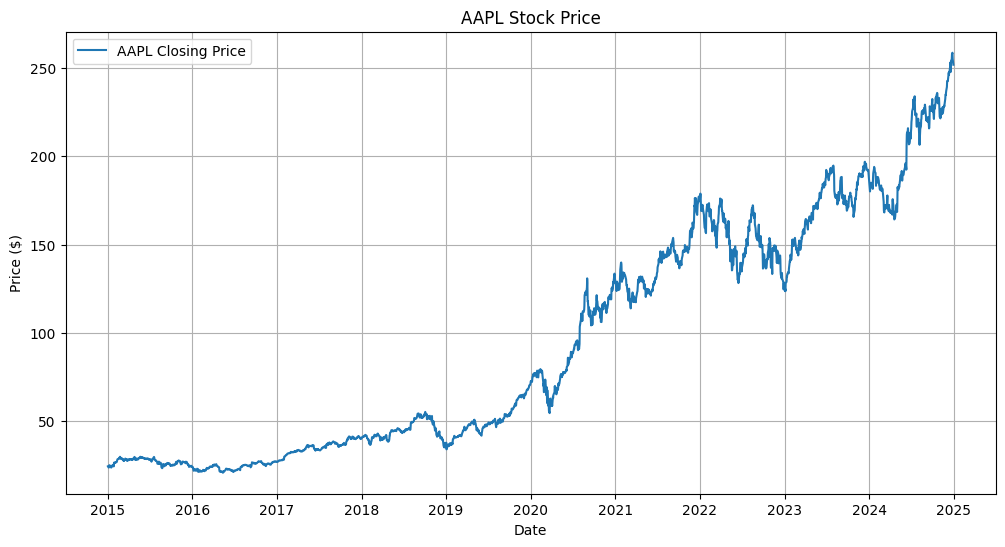

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(stock['Close'], label='AAPL Closing Price')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
# Use only the 'Close' column
data = stock[['Close']].dropna()

# Normalize
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Create sequences
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

e:\FUTURE_ML_02\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0182 - val_loss: 8.3513e-04
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.4275e-04 - val_loss: 7.4081e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.1760e-04 - val_loss: 0.0017
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.1510e-04 - val_loss: 0.0015
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.5753e-04 - val_loss: 0.0014
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.4694e-04 - val_loss: 0.0012
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.4392e-04 - val_loss: 0.0018
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.3833e-04 - val_loss: 7.2836e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.0359e-04 - val_loss: 0.0014
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.9670e-04 - val_loss: 8.6152e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.1581e-04 - val_loss: 9.0419e-04
Epo

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


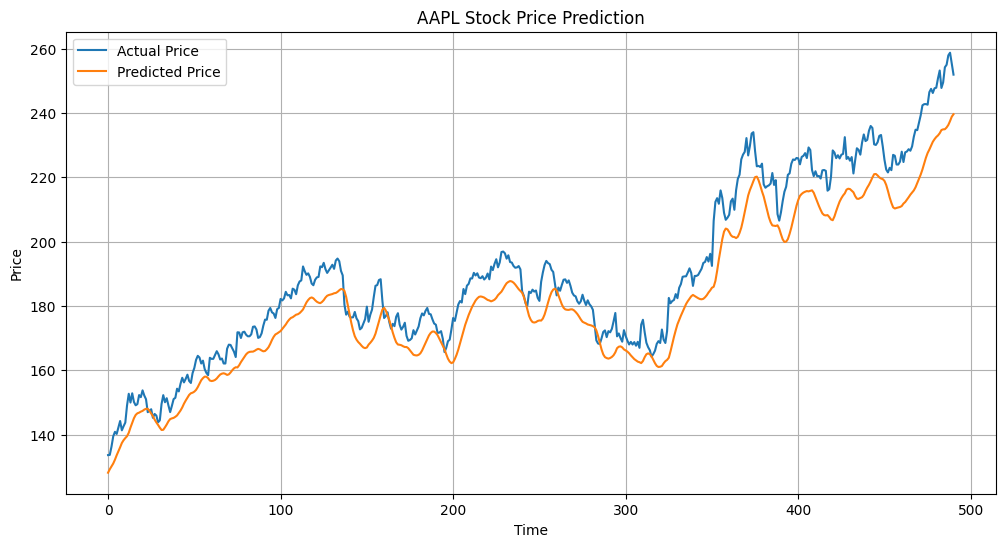

RMSE: 10.05
MAE : 8.81


In [15]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("AAPL Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f'RMSE: {rmse:.2f}')
print(f'MAE : {mae:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

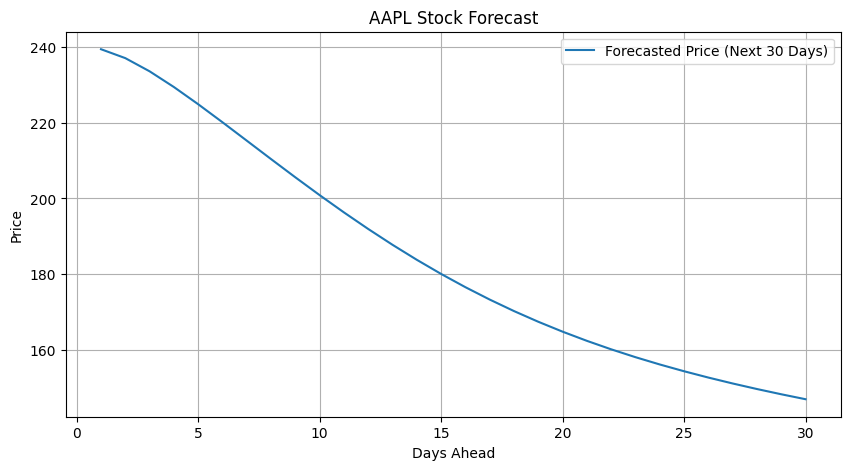

In [16]:
# Predict next 30 days using last sequence
last_sequence = scaled_data[-sequence_length:]
future_input = last_sequence.reshape((1, sequence_length, 1))
future_predictions = []

for _ in range(30):
    pred = model.predict(future_input)[0, 0]
    future_predictions.append(pred)
    future_input = np.append(future_input[:, 1:, :], [[[pred]]], axis=1)

# Inverse scale
future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot
plt.figure(figsize=(10,5))
plt.plot(range(1, 31), future_prices, label="Forecasted Price (Next 30 Days)")
plt.title("AAPL Stock Forecast")
plt.xlabel("Days Ahead")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()